### Computational Guided Inquiry for PChem (Neshyba & Guasco, 2018)

# Visualizing $H(T,P)$

## Introduction

The ideal gas enthalpy for a linear, non-vibrating molecule is given by  

<p style='text-align: right;'>
$ H_{ideal} = \dfrac{7}{2}RT $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (1) $
</p>
<br>

Simulating a real gas, van der Waals would modify this expression as  

<p style='text-align: right;'>
$ H_{real} = \dfrac{7}{2}RT -\dfrac{2aP}{RT} + bP $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (2) $
</p>

This latter gas appears very different from an ideal gas in a pressure-temperature state space (i.e., $H(T,P)$). In particular, it's slope in the pressure direction, $\big (\partial H/ \partial P \big )_T$ (which you also know as $\mu_T$), tends to be negative at low temperature, and positive at high temperature. Therefore there is a temperature, called the *Inversion temperature*, at which the crossover happens, and $\big (\partial H/ \partial P \big )_T=0$.

## Learning goals: 
- Get a feel for constructing $H(T,P)$ for a van der Waals gas
- Get a feel for identifying the Inversion temperature of a gas from the appearance of $H(T,P)$

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

### Defining the van der Waals parameters

In [2]:
# In the SI system
R = .082

# vdw parameters for CO2, also SI
a = 3.6 
b = .043

### Constructing $H(T,P)$
In the cell below, we make a guess at a temperature range by specifying the center and a range above and below it, then construct $H(T,P)$ from it according to Eq. (2). After running the cell once, adjust the center temperature (T_center) up or down, until it more or less concides with the Boyle temperature.

Here's a hint: In a Joule-Thomson experiment, gases follow isenthalps as they go from high pressure to low. Isenthalps that veer off toward lower temperatures at lower pressures mean the starting temperature is below the inversion temperature.

Text(0, 0.5, 'P')

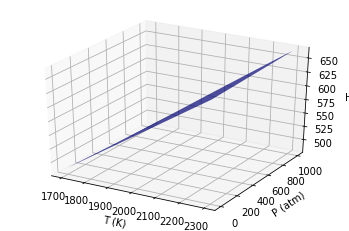

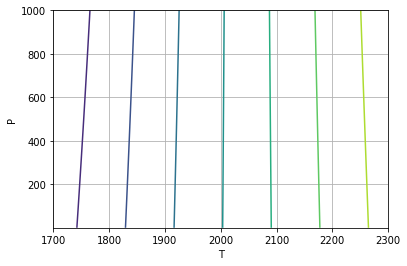

In [3]:
# Change T_center to a higher or lower value after you've run this once
T_center = 1500
T_interval = 300
Tgrid,Pgrid = PL.Statespace([T_center-T_interval, T_center+T_interval,76],[1,1000,75])

# Calculate H(T,P) for the gas; call the variable Hgrid
### BEGIN SOLUTION
T_center = 2000
Tgrid,Pgrid = PL.Statespace([T_center-T_interval, T_center+T_interval,76],[1,1000,75])
Hgrid = 7/2*R*Tgrid - 2*a*Pgrid/(R*Tgrid) + b*Pgrid
### END SOLUTION

# Graph it in 3d
ax = PL.plot_surface(Tgrid, Pgrid, Hgrid, color='blue') # Make the mesh plot
ax.set_xlabel('T (K)')
ax.set_ylabel('P (atm)') # Label axes
ax.set_zlabel('H')

# Graph it as a contour plot
plt.figure()
plt.grid(True)
plt.contour(Tgrid, Pgrid, Hgrid)
plt.xlabel('T')
plt.ylabel('P')